<a href="https://colab.research.google.com/github/shubhamByte/Machine-Learning/blob/main/RNN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating DataSet from CSV

In [60]:
from pandas import read_csv 
import numpy as np

In [61]:
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1])
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [62]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [63]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [65]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [66]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [67]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

# RNN

In [68]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [69]:
model = Sequential()
model.add(SimpleRNN(20, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 1s 3ms/step - loss: 0.0279
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 9/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 10/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0044


# Visualising Result

In [70]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

3/3 [==============================] - 0s 4ms/step


((36,), (36,))

In [71]:
from matplotlib import pyplot as plt

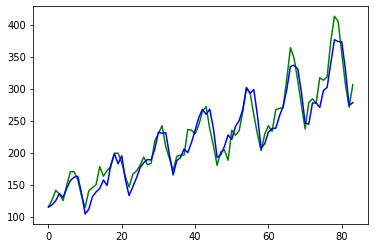

In [72]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

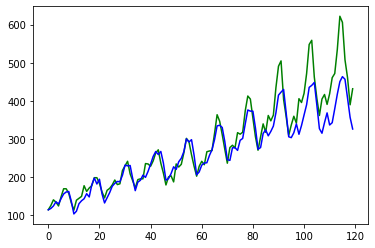

In [73]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()